# Orbit games

We consider energy plots and orbital solutions in polar coordinates for the general potential energy

$\begin{align}
   U(r) = k r^n
\end{align}$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [34]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [35]:
class Orbit:
    """
    Potentials and associated differential equations for central force motion
    with the potential U(r) = k r^n.
    """
    
    def __init__(self, ang_mom, n, k=1, mu=1):
        self.ang_mom = ang_mom
        self.n = n
        self.k = k
        self.mu = mu
    
    def U(self, r):
        """Potential energy of the form U = kr^n."""
        return self.k * r**self.n
    
    def Ucf(self, r):
        """Centrifugal potential energy"""
        return self.ang_mom**2 / (2. * self.mu * r**2)
    
    def Ueff(self, r):
        """Effective potential energy"""
        return self.U(r) + self.Ucf(r)
    
    def U_deriv(self, r):
        """dU/dr"""
        return self.n * self.k * r**(self.n - 1)
        
    def Ucf_deriv(self, r):
        """dU_cf/dr"""
        return -2. * self.ang_mom**2 / (2. * self.mu * r**3)
        
    def Ueff_deriv(self, r):
        """dU_eff/dr"""
        return self.U_deriv(r) + self.Ucf_deriv(r)
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dr/dt d^2r/dt^2 dphi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            3-component vector with y[0] = r(t), y[1] = dr/dt, y[2] = dphi/dt
            
        """
        return [ y[1], 
                -1./self.mu * self.Ueff_deriv(y[0]), 
                self.ang_mom / (self.mu * y[0]**2) ]
    
    
    def solve_ode(self, t_pts, r_0, r_dot_0, phi_0, 
                  abserr=1.0e-12, relerr=1.0e-12):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [r_0, r_dot_0, phi_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        r, r_dot, phi = solution.y
        return r, r_dot, phi
    
    def energy(self, t_pts, r, r_dot):
        """Evaluate the energy as a function of time"""
        return (self.mu/2.) * r_dot**2 + self.Ueff(r)

In [36]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# Spring: $n = 2$

266
0.6661995997998998
-0.0994553243657148


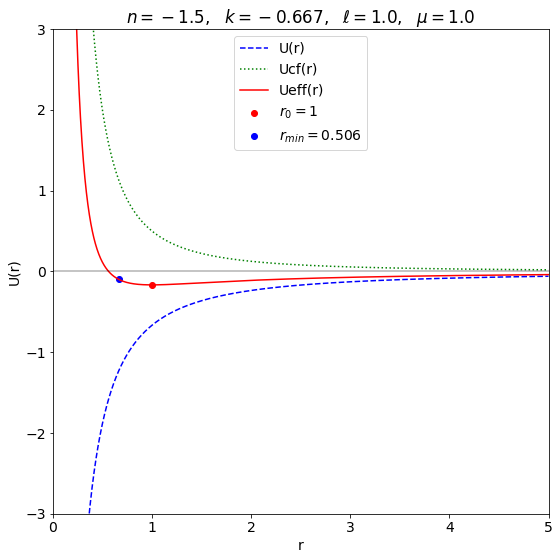

In [82]:
'''
n = -1
k = -3 
ang_mom = 1
'''

o1 = Orbit(ang_mom=1., n=-3./2., k=-2./3., mu=1.)
o2 = Orbit(ang_mom=1., n=-1., k=-1., mu=1.)
o3 = Orbit(ang_mom=1., n=7., k=1/7., mu=1.)
o4 = Orbit(ang_mom=1., n=3., k=1/3., mu=1.)
o5 = Orbit(ang_mom=1., n=4., k=1/4., mu=1.)

r_pts = np.linspace(0.001, 5., 2000)

U_pts1 = o1.U(r_pts)
Ucf_pts1 = o1.Ucf(r_pts)
Ueff_pts1 = o1.Ueff(r_pts)

U_pts2 = o2.U(r_pts)
Ucf_pts2 = o2.Ucf(r_pts)
Ueff_pts2 = o2.Ueff(r_pts)

U_pts3 = o3.U(r_pts)
Ucf_pts3 = o3.Ucf(r_pts)
Ueff_pts3 = o3.Ueff(r_pts)

r0 = 1

fig_1 = plt.figure(figsize=(8,8))

ax_1 = fig_1.add_subplot(1,1,1)
ax_1.plot(r_pts, U_pts1, linestyle='dashed', color='blue', label='U(r)')
ax_1.plot(r_pts, Ucf_pts1, linestyle='dotted', color='green', label='Ucf(r)')
ax_1.plot(r_pts, Ueff_pts1, linestyle='solid', color='red', label='Ueff(r)')
ax_1.scatter(1, o1.Ueff(1), color='red', label=f'$r_0=1$')
ax_1.scatter(0.6662, -0.1, color='blue', label=f'$r_{"{min}"}=0.506$')
ax_1.set_xlim(0., 5.)
ax_1.set_ylim(-3., 3.)
ax_1.set_xlabel('r')
ax_1.set_ylabel('U(r)')
ax_1.set_title(f'$n = {o1.n},\ \ k = {o1.k:.3f},\ \  \ell = {o1.ang_mom},\ \ \mu = {o1.mu}$')
ax_1.legend(loc='upper center')
ax_1.axhline(0., color='black', alpha=0.3)
'''
ax_2 = fig_1.add_subplot(1,3,2)
ax_2.plot(r_pts, U_pts2, linestyle='dashed', color='blue', label='U(r)')
ax_2.plot(r_pts, Ucf_pts2, linestyle='dotted', color='green', label='Ucf(r)')
ax_2.plot(r_pts, Ueff_pts2, linestyle='solid', color='red', label='Ueff(r)')
ax_2.scatter(1, o2.Ueff(1), color='red', label=f'$r_0=1$')
ax_2.set_xlim(0., 3.)
ax_2.set_ylim(-5., 5.)
ax_2.set_xlabel('r')
ax_2.set_ylabel('U(r)')
ax_2.set_title(f'$n = {-1},\ \ k = {-1},\ \  l = {1}$')
ax_2.legend(loc='upper center')
ax_2.axhline(0., color='black', alpha=0.3)

ax_3 = fig_1.add_subplot(1,3,3)
ax_3.plot(r_pts, U_pts3, linestyle='dashed', color='blue', label='U(r)')
ax_3.plot(r_pts, Ucf_pts3, linestyle='dotted', color='green', label='Ucf(r)')
ax_3.plot(r_pts, Ueff_pts3, linestyle='solid', color='red', label='Ueff(r)')
ax_3.scatter(1, o3.Ueff(1), color='red', label=f'$r_0=1$')
ax_3.set_xlim(0., 3.)
ax_3.set_ylim(-5., 5.)
ax_3.set_xlabel('r')
ax_3.set_ylabel('U(r)')
ax_3.set_title(f'$n = {-3},\ \ k = {-1/3:.3f},\ \  l = {1}$')
ax_3.legend(loc='upper center')
ax_3.axhline(0., color='black', alpha=0.3)

'''
fig_1.tight_layout()

fig_1.savefig('Taylor_8.25_a.png')


indmin = (np.abs(Ueff_pts1[0:400]+0.1)).argmin()
print(indmin)
print(r_pts[indmin])
print(o1.Ueff(0.6662))

In [75]:
# Plotting time 
t_start = 0.
t_end = 38
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
r_0 = 1
eps = -r_0+0.6662
r_dot_0 = 0.
phi_0 = 0.0
r_pts1c, r_dot_pts1c, phi_pts1c = o1.solve_ode(t_pts, r_0, r_dot_0, phi_0)
r_pts1p, r_dot_pts1p, phi_pts1p = o1.solve_ode(t_pts, r_0+eps, r_dot_0, phi_0)
print(phi_pts1p[-1]/np.pi)
r_pts2c, r_dot_pts2c, phi_pts2c = o2.solve_ode(t_pts, r_0, r_dot_0, phi_0)
r_pts2p, r_dot_pts2p, phi_pts2p = o2.solve_ode(t_pts, r_0+eps, r_dot_0, phi_0)

r_pts3c, r_dot_pts3c, phi_pts3c = o3.solve_ode(t_pts, r_0, r_dot_0, phi_0)
r_pts3p, r_dot_pts3p, phi_pts3p = o3.solve_ode(t_pts, r_0+eps, r_dot_0, phi_0)

7.0009864185524044


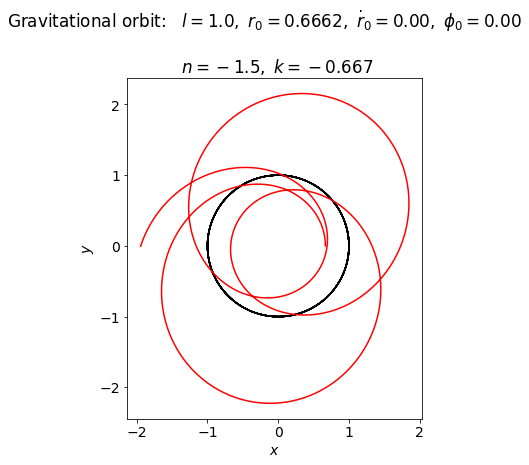

In [79]:


fig_4 = plt.figure(figsize=(6,6))

overall_title = 'Gravitational orbit:  ' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0+eps:.4f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_4.suptitle(overall_title, va='baseline')

title1 =rf' $n = {o1.n},$' + rf' $k = {o1.k:.3f}$'
title2 =rf' $n = {o2.n},$' + rf' $k = {o2.k:.3f}$'
title3 =rf' $n = {o3.n},$' + rf' $k = {o3.k:.3f}$'


ax_41 = fig_4.add_subplot(1,1,1)
ax_41.plot(r_pts1c*np.cos(phi_pts1c), r_pts1c*np.sin(phi_pts1c), color='black')
ax_41.plot(r_pts1p*np.cos(phi_pts1p), r_pts1p*np.sin(phi_pts1p), color='red')
ax_41.set_xlabel(r'$x$')
ax_41.set_ylabel(r'$y$')
ax_41.set_aspect(1)
ax_41.set_title(title1)


'''
ax_42 = fig_4.add_subplot(2,2,2)
ax_42.plot(r_pts2c*np.cos(phi_pts2c), r_pts2c*np.sin(phi_pts2c), color='black')
ax_42.plot(r_pts2p*np.cos(phi_pts2p), r_pts2p*np.sin(phi_pts2p), color='red')
ax_42.set_xlabel(r'$x$')
ax_42.set_ylabel(r'$y$')
ax_42.set_aspect(1)
ax_42.set_title(title2)

ax_42 = fig_4.add_subplot(2,2,3)
ax_42.plot(r_pts3c*np.cos(phi_pts3c), r_pts3c*np.sin(phi_pts3c), color='black')
ax_42.plot(r_pts3p*np.cos(phi_pts3p), r_pts3p*np.sin(phi_pts3p), color='red')
ax_42.set_xlabel(r'$x$')
ax_42.set_ylabel(r'$y$')
ax_42.set_aspect(1)
ax_42.set_title(title3)
'''
fig_4.tight_layout()
fig_4.savefig('Taylor_8.25_c.png')


## Orbit (time dependence)

We'll directly solve the equations for r(t) and phi(t).

In [32]:
# Plotting time 
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
r_0 = 0.2
r_dot_0 = 0.
phi_0 = 0.0
r_pts, r_dot_pts, phi_pts = o1.solve_ode(t_pts, r_0, r_dot_0, phi_0)

c = o1.ang_mom**2 / (np.abs(o1.k) * o1.mu)
epsilon = c / r_0 - 1.
energy_0 = o1.mu/2. * r_dot_0**2 + o1.Ueff(r_0)
print(f'energy = {energy_0:.2f}')
print(f'eccentricity = {epsilon:.2f}')

energy = 12.52
eccentricity = 9.00


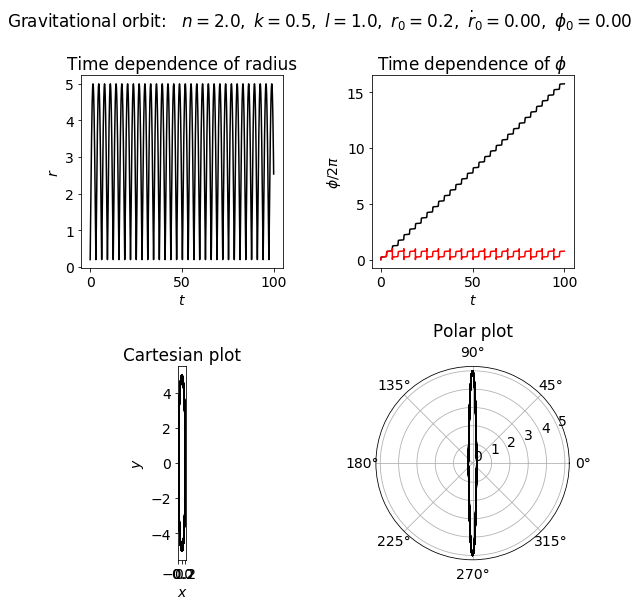

In [37]:
fig_4 = plt.figure(figsize=(8,8))

overall_title = 'Gravitational orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_4.suptitle(overall_title, va='baseline')

ax_4a = fig_4.add_subplot(2,2,1)
ax_4a.plot(t_pts, r_pts, color='black')
ax_4a.set_xlabel(r'$t$')
ax_4a.set_ylabel(r'$r$')
ax_4a.set_title('Time dependence of radius')

ax_4b = fig_4.add_subplot(2,2,2)
ax_4b.plot(t_pts, phi_pts/(2.*np.pi), color='black')
ax_4b.plot(t_pts, phi_pts/(2.*np.pi)%1, color='red')
ax_4b.set_xlabel(r'$t$')
ax_4b.set_ylabel(r'$\phi/2\pi$')
ax_4b.set_title(r'Time dependence of $\phi$')

ax_4c = fig_4.add_subplot(2,2,3)
ax_4c.plot(r_pts*np.cos(phi_pts), r_pts*np.sin(phi_pts), color='black')
ax_4c.set_xlabel(r'$x$')
ax_4c.set_ylabel(r'$y$')
ax_4c.set_aspect(1)
ax_4c.set_title('Cartesian plot')

ax_4d = fig_4.add_subplot(2,2,4, polar=True)
ax_4d.plot(phi_pts, r_pts, color='black')
ax_4d.set_title('Polar plot', pad=20.)


fig_4.tight_layout()



## Energy versus time

In [17]:
E_tot_pts = o1.energy(t_pts, r_pts, r_dot_pts)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

print(f'    t        E_tot        rel. error')
for t, E_tot, E_tot_rel in zip(t_pts, E_tot_pts, E_tot_rel_pts):
    print(f'{t:8.5f}  {E_tot:8.5e}  {E_tot_rel:12.4e}')

    t        E_tot        rel. error
 0.00000  -2.50000e+00    0.0000e+00
 0.01000  -2.50000e+00    6.1640e-14
 0.02000  -2.50000e+00    1.6769e-13
 0.03000  -2.50000e+00    8.5603e-13
 0.04000  -2.50000e+00    4.5475e-14
 0.05000  -2.50000e+00    3.3236e-13
 0.06000  -2.50000e+00    7.6810e-13
 0.07000  -2.50000e+00    4.1904e-13
 0.08000  -2.50000e+00    1.9371e-12
 0.09000  -2.50000e+00    3.3623e-12
 0.10000  -2.50000e+00    5.8328e-12
 0.11000  -2.50000e+00    9.7586e-12
 0.12000  -2.50000e+00    8.4698e-12
 0.13000  -2.50000e+00    2.5330e-11
 0.14000  -2.50000e+00    9.8904e-12
 0.15000  -2.50000e+00    1.3054e-11
 0.16000  -2.50000e+00    7.1559e-12
 0.17000  -2.50000e+00    6.9935e-12
 0.18000  -2.50000e+00    5.4184e-12
 0.19000  -2.50000e+00    9.6101e-12
 0.20000  -2.50000e+00    4.6469e-13
 0.21000  -2.50000e+00    6.7804e-12
 0.22000  -2.50000e+00    3.8806e-12
 0.23000  -2.50000e+00    1.1161e-12
 0.24000  -2.50000e+00    3.4140e-12
 0.25000  -2.50000e+00    3.8128e-12
 

 8.68000  -2.50000e+00    2.6254e-11
 8.69000  -2.50000e+00    2.8167e-11
 8.70000  -2.50000e+00    2.1805e-11
 8.71000  -2.50000e+00    1.8104e-11
 8.72000  -2.50000e+00    2.7102e-11
 8.73000  -2.50000e+00    1.8750e-11
 8.74000  -2.50000e+00    2.6105e-11
 8.75000  -2.50000e+00    1.9778e-11
 8.76000  -2.50000e+00    2.1856e-11
 8.77000  -2.50000e+00    2.4792e-11
 8.78000  -2.50000e+00    2.1702e-11
 8.79000  -2.50000e+00    2.0460e-11
 8.80000  -2.50000e+00    2.1899e-11
 8.81000  -2.50000e+00    2.2611e-11
 8.82000  -2.50000e+00    2.2701e-11
 8.83000  -2.50000e+00    2.2111e-11
 8.84000  -2.50000e+00    2.1667e-11
 8.85000  -2.50000e+00    2.1585e-11
 8.86000  -2.50000e+00    2.1709e-11
 8.87000  -2.50000e+00    2.1848e-11
 8.88000  -2.50000e+00    2.1915e-11
 8.89000  -2.50000e+00    2.1922e-11
 8.90000  -2.50000e+00    2.1888e-11
 8.91000  -2.50000e+00    2.1816e-11
 8.92000  -2.50000e+00    2.1739e-11
 8.93000  -2.50000e+00    2.1674e-11
 8.94000  -2.50000e+00    2.1627e-11
 

18.67000  -2.50000e+00    5.4346e-11
18.68000  -2.50000e+00    2.5467e-11
18.69000  -2.50000e+00    4.4810e-11
18.70000  -2.50000e+00    5.0834e-11
18.71000  -2.50000e+00    5.0601e-11
18.72000  -2.50000e+00    4.5344e-11
18.73000  -2.50000e+00    3.7695e-11
18.74000  -2.50000e+00    5.5769e-11
18.75000  -2.50000e+00    4.0282e-11
18.76000  -2.50000e+00    5.1859e-11
18.77000  -2.50000e+00    5.2771e-11
18.78000  -2.50000e+00    4.8098e-11
18.79000  -2.50000e+00    4.7982e-11
18.80000  -2.50000e+00    5.1493e-11
18.81000  -2.50000e+00    5.1644e-11
18.82000  -2.50000e+00    4.5165e-11
18.83000  -2.50000e+00    4.6041e-11
18.84000  -2.50000e+00    4.8434e-11
18.85000  -2.50000e+00    4.4951e-11
18.86000  -2.50000e+00    4.6578e-11
18.87000  -2.50000e+00    4.9360e-11
18.88000  -2.50000e+00    4.4180e-11
18.89000  -2.50000e+00    4.6498e-11
18.90000  -2.50000e+00    4.8598e-11
18.91000  -2.50000e+00    4.7266e-11
18.92000  -2.50000e+00    4.5618e-11
18.93000  -2.50000e+00    4.5783e-11
1

27.25000  -2.50000e+00    6.2883e-11
27.26000  -2.50000e+00    7.0787e-11
27.27000  -2.50000e+00    6.6662e-11
27.28000  -2.50000e+00    6.9199e-11
27.29000  -2.50000e+00    6.5446e-11
27.30000  -2.50000e+00    7.0519e-11
27.31000  -2.50000e+00    6.6296e-11
27.32000  -2.50000e+00    6.5649e-11
27.33000  -2.50000e+00    6.7691e-11
27.34000  -2.50000e+00    6.8683e-11
27.35000  -2.50000e+00    6.7199e-11
27.36000  -2.50000e+00    6.6200e-11
27.37000  -2.50000e+00    6.6414e-11
27.38000  -2.50000e+00    6.6927e-11
27.39000  -2.50000e+00    6.7041e-11
27.40000  -2.50000e+00    6.7058e-11
27.41000  -2.50000e+00    6.6944e-11
27.42000  -2.50000e+00    6.6807e-11
27.43000  -2.50000e+00    6.6724e-11
27.44000  -2.50000e+00    6.6707e-11
27.45000  -2.50000e+00    6.6736e-11
27.46000  -2.50000e+00    6.6786e-11
27.47000  -2.50000e+00    6.6836e-11
27.48000  -2.50000e+00    6.6879e-11
27.49000  -2.50000e+00    6.6909e-11
27.50000  -2.50000e+00    6.6927e-11
27.51000  -2.50000e+00    6.6935e-11
2

33.66000  -2.50000e+00    8.2755e-11
33.67000  -2.50000e+00    8.2922e-11
33.68000  -2.50000e+00    8.1916e-11
33.69000  -2.50000e+00    8.1995e-11
33.70000  -2.50000e+00    8.1704e-11
33.71000  -2.50000e+00    8.1691e-11
33.72000  -2.50000e+00    8.1585e-11
33.73000  -2.50000e+00    8.1465e-11
33.74000  -2.50000e+00    8.1379e-11
33.75000  -2.50000e+00    8.1270e-11
33.76000  -2.50000e+00    8.0899e-11
33.77000  -2.50000e+00    8.0371e-11
33.78000  -2.50000e+00    8.0643e-11
33.79000  -2.50000e+00    8.1213e-11
33.80000  -2.50000e+00    8.2595e-11
33.81000  -2.50000e+00    8.2289e-11
33.82000  -2.50000e+00    7.8166e-11
33.83000  -2.50000e+00    7.0537e-11
33.84000  -2.50000e+00    6.3012e-11
33.85000  -2.50000e+00    1.0326e-10
33.86000  -2.50000e+00    1.0202e-10
33.87000  -2.50000e+00    8.3605e-11
33.88000  -2.50000e+00    7.9300e-11
33.89000  -2.50000e+00    8.5631e-11
33.90000  -2.50000e+00    9.4486e-11
33.91000  -2.50000e+00    8.1766e-11
33.92000  -2.50000e+00    8.6455e-11
3

43.66000  -2.50000e+00    8.3203e-11
43.67000  -2.50000e+00    1.0454e-10
43.68000  -2.50000e+00    1.1487e-10
43.69000  -2.50000e+00    1.3038e-10
43.70000  -2.50000e+00    1.1613e-10
43.71000  -2.50000e+00    9.7312e-11
43.72000  -2.50000e+00    9.0620e-11
43.73000  -2.50000e+00    1.0114e-10
43.74000  -2.50000e+00    1.0520e-10
43.75000  -2.50000e+00    1.0426e-10
43.76000  -2.50000e+00    1.0715e-10
43.77000  -2.50000e+00    1.0655e-10
43.78000  -2.50000e+00    1.0635e-10
43.79000  -2.50000e+00    1.0690e-10
43.80000  -2.50000e+00    1.0610e-10
43.81000  -2.50000e+00    1.0664e-10
43.82000  -2.50000e+00    1.0652e-10
43.83000  -2.50000e+00    1.0625e-10
43.84000  -2.50000e+00    1.0617e-10
43.85000  -2.50000e+00    1.0608e-10
43.86000  -2.50000e+00    1.0605e-10
43.87000  -2.50000e+00    1.0645e-10
43.88000  -2.50000e+00    1.0591e-10
43.89000  -2.50000e+00    1.0493e-10
43.90000  -2.50000e+00    1.0568e-10
43.91000  -2.50000e+00    1.0472e-10
43.92000  -2.50000e+00    1.0817e-10
4

53.65000  -2.50000e+00    1.3093e-10
53.66000  -2.50000e+00    1.1924e-10
53.67000  -2.50000e+00    1.3250e-10
53.68000  -2.50000e+00    1.1944e-10
53.69000  -2.50000e+00    1.3087e-10
53.70000  -2.50000e+00    1.3414e-10
53.71000  -2.50000e+00    1.2514e-10
53.72000  -2.50000e+00    1.2353e-10
53.73000  -2.50000e+00    1.2293e-10
53.74000  -2.50000e+00    1.3466e-10
53.75000  -2.50000e+00    1.3314e-10
53.76000  -2.50000e+00    1.1627e-10
53.77000  -2.50000e+00    1.3914e-10
53.78000  -2.50000e+00    1.1799e-10
53.79000  -2.50000e+00    1.0964e-10
53.80000  -2.50000e+00    1.1859e-10
53.81000  -2.50000e+00    1.2448e-10
53.82000  -2.50000e+00    9.3941e-11
53.83000  -2.50000e+00    1.0360e-10
53.84000  -2.50000e+00    1.2949e-10
53.85000  -2.50000e+00    1.3148e-10
53.86000  -2.50000e+00    1.3487e-10
53.87000  -2.50000e+00    1.2936e-10
53.88000  -2.50000e+00    1.3124e-10
53.89000  -2.50000e+00    1.3131e-10
53.90000  -2.50000e+00    1.3083e-10
53.91000  -2.50000e+00    1.3116e-10
5

63.65000  -2.50000e+00    1.5238e-10
63.66000  -2.50000e+00    1.5207e-10
63.67000  -2.50000e+00    1.5220e-10
63.68000  -2.50000e+00    1.5278e-10
63.69000  -2.50000e+00    1.5373e-10
63.70000  -2.50000e+00    1.5429e-10
63.71000  -2.50000e+00    1.5354e-10
63.72000  -2.50000e+00    1.5252e-10
63.73000  -2.50000e+00    1.4882e-10
63.74000  -2.50000e+00    1.5225e-10
63.75000  -2.50000e+00    1.5735e-10
63.76000  -2.50000e+00    1.4951e-10
63.77000  -2.50000e+00    1.5258e-10
63.78000  -2.50000e+00    1.5436e-10
63.79000  -2.50000e+00    1.5121e-10
63.80000  -2.50000e+00    1.5012e-10
63.81000  -2.50000e+00    1.5793e-10
63.82000  -2.50000e+00    1.5344e-10
63.83000  -2.50000e+00    1.4632e-10
63.84000  -2.50000e+00    1.4424e-10
63.85000  -2.50000e+00    1.4859e-10
63.86000  -2.50000e+00    1.6163e-10
63.87000  -2.50000e+00    1.5617e-10
63.88000  -2.50000e+00    1.4575e-10
63.89000  -2.50000e+00    1.5431e-10
63.90000  -2.50000e+00    1.6437e-10
63.91000  -2.50000e+00    1.5497e-10
6

73.64000  -2.50000e+00    1.7730e-10
73.65000  -2.50000e+00    1.7729e-10
73.66000  -2.50000e+00    1.7727e-10
73.67000  -2.50000e+00    1.7726e-10
73.68000  -2.50000e+00    1.7725e-10
73.69000  -2.50000e+00    1.7725e-10
73.70000  -2.50000e+00    1.7725e-10
73.71000  -2.50000e+00    1.7726e-10
73.72000  -2.50000e+00    1.7729e-10
73.73000  -2.50000e+00    1.7733e-10
73.74000  -2.50000e+00    1.7739e-10
73.75000  -2.50000e+00    1.7748e-10
73.76000  -2.50000e+00    1.7762e-10
73.77000  -2.50000e+00    1.7780e-10
73.78000  -2.50000e+00    1.7805e-10
73.79000  -2.50000e+00    1.7751e-10
73.80000  -2.50000e+00    1.7716e-10
73.81000  -2.50000e+00    1.7617e-10
73.82000  -2.50000e+00    1.7449e-10
73.83000  -2.50000e+00    1.7400e-10
73.84000  -2.50000e+00    1.7759e-10
73.85000  -2.50000e+00    1.7988e-10
73.86000  -2.50000e+00    1.7658e-10
73.87000  -2.50000e+00    1.7285e-10
73.88000  -2.50000e+00    1.8164e-10
73.89000  -2.50000e+00    1.7307e-10
73.90000  -2.50000e+00    1.7917e-10
7

83.64000  -2.50000e+00    2.0206e-10
83.65000  -2.50000e+00    2.0206e-10
83.66000  -2.50000e+00    2.0206e-10
83.67000  -2.50000e+00    2.0206e-10
83.68000  -2.50000e+00    2.0206e-10
83.69000  -2.50000e+00    2.0207e-10
83.70000  -2.50000e+00    2.0207e-10
83.71000  -2.50000e+00    2.0208e-10
83.72000  -2.50000e+00    2.0208e-10
83.73000  -2.50000e+00    2.0209e-10
83.74000  -2.50000e+00    2.0210e-10
83.75000  -2.50000e+00    2.0211e-10
83.76000  -2.50000e+00    2.0211e-10
83.77000  -2.50000e+00    2.0212e-10
83.78000  -2.50000e+00    2.0213e-10
83.79000  -2.50000e+00    2.0213e-10
83.80000  -2.50000e+00    2.0214e-10
83.81000  -2.50000e+00    2.0213e-10
83.82000  -2.50000e+00    2.0212e-10
83.83000  -2.50000e+00    2.0209e-10
83.84000  -2.50000e+00    2.0205e-10
83.85000  -2.50000e+00    2.0197e-10
83.86000  -2.50000e+00    2.0187e-10
83.87000  -2.50000e+00    2.0171e-10
83.88000  -2.50000e+00    2.0149e-10
83.89000  -2.50000e+00    2.0117e-10
83.90000  -2.50000e+00    2.0116e-10
8

93.63000  -2.50000e+00    2.2664e-10
93.64000  -2.50000e+00    2.2664e-10
93.65000  -2.50000e+00    2.2664e-10
93.66000  -2.50000e+00    2.2664e-10
93.67000  -2.50000e+00    2.2663e-10
93.68000  -2.50000e+00    2.2663e-10
93.69000  -2.50000e+00    2.2662e-10
93.70000  -2.50000e+00    2.2662e-10
93.71000  -2.50000e+00    2.2661e-10
93.72000  -2.50000e+00    2.2661e-10
93.73000  -2.50000e+00    2.2660e-10
93.74000  -2.50000e+00    2.2660e-10
93.75000  -2.50000e+00    2.2659e-10
93.76000  -2.50000e+00    2.2658e-10
93.77000  -2.50000e+00    2.2657e-10
93.78000  -2.50000e+00    2.2656e-10
93.79000  -2.50000e+00    2.2655e-10
93.80000  -2.50000e+00    2.2654e-10
93.81000  -2.50000e+00    2.2653e-10
93.82000  -2.50000e+00    2.2651e-10
93.83000  -2.50000e+00    2.2650e-10
93.84000  -2.50000e+00    2.2649e-10
93.85000  -2.50000e+00    2.2647e-10
93.86000  -2.50000e+00    2.2646e-10
93.87000  -2.50000e+00    2.2644e-10
93.88000  -2.50000e+00    2.2643e-10
93.89000  -2.50000e+00    2.2641e-10
9

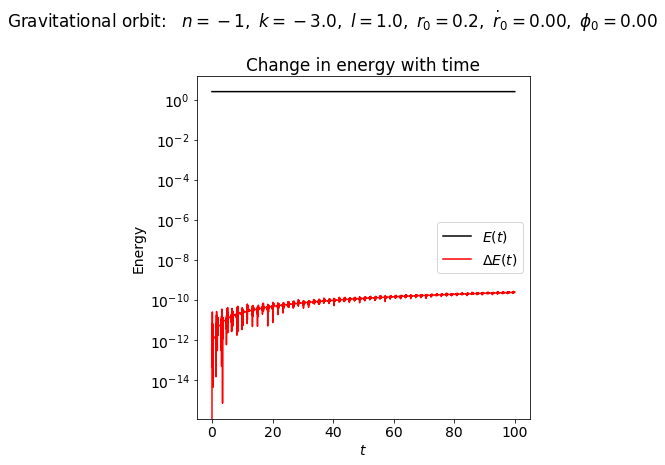

In [18]:
fig_5 = plt.figure(figsize=(6,6))

overall_title = 'Gravitational orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_5.suptitle(overall_title, va='baseline')

ax_5a = fig_5.add_subplot(1,1,1)
ax_5a.semilogy(t_pts, np.abs(E_tot_pts), color='black', label=r'$E(t)$')
ax_5a.semilogy(t_pts, E_tot_rel_pts, color='red', label=r'$\Delta E(t)$')
ax_5a.set_xlabel(r'$t$')
ax_5a.set_ylabel(r'Energy')
ax_5a.set_title('Change in energy with time')
ax_5a.legend(loc='center right')

fig_5.tight_layout()

In [65]:
# Plotting time 
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)
print("t_pts",t_pts.shape)
t_range = t_pts[-1] - t_pts[0]

r_0 = 1.
r_dot_0 = 0.
phi_0 = 0.0

o_1 = Orbit(ang_mom=1., n=-3., k=-1/.3, mu=1.)
o_2 = Orbit(ang_mom=1., n=-1., k=-1., mu=1.)
o_3 = Orbit(ang_mom=1., n=2., k=1/2., mu=1.)
o_4 = Orbit(ang_mom=1., n=3., k=1/3., mu=1.)
o_5 = Orbit(ang_mom=1., n=4., k=1/4., mu=1.)

r_pts1, r_dot_pts1, phi_pts = o_1.solve_ode(t_pts, r_0, r_dot_0, phi_0)
print("r_pts", r_pts1.shape)
r_pts2, r_dot_pts2, phi_pts = o_2.solve_ode(t_pts, r_0, r_dot_0, phi_0)
r_pts3, r_dot_pts3, phi_pts = o3.solve_ode(t_pts, r_0, r_dot_0, phi_0)
r_pts4, r_dot_pts4, phi_pts = o4.solve_ode(t_pts, r_0, r_dot_0, phi_0)
r_pts5, r_dot_pts5, phi_pts = o5.solve_ode(t_pts, r_0, r_dot_0, phi_0)

U_pts1=o1.U(r_pts1)
U_pts2=o2.U(r_pts2)
U_pts3=o3.U(r_pts3)
U_pts4=o4.U(r_pts4)
U_pts5=o5.U(r_pts5)
print(U_pts1.shape)
T_pts1 = o1.energy(t_pts, r_pts1, r_dot_pts1) - U_pts1
T_pts2 = o2.energy(t_pts, r_pts2, r_dot_pts2) - U_pts2
T_pts3 = o3.energy(t_pts, r_pts3, r_dot_pts3) - U_pts3
T_pts4 = o4.energy(t_pts, r_pts4, r_dot_pts4) - U_pts4
T_pts5 = o5.energy(t_pts, r_pts5, r_dot_pts5) - U_pts5

print(T_pts1.shape)

t_pts (10001,)
r_pts (31,)
(31,)
(31,)


In [55]:
from scipy.integrate import simps

T_avg1 = simps(T_pts1, t_pts, delta_t) /t_range
U_avg1 = simps(U_pts1, t_pts, delta_t) /t_range
print(T_avg1, o1.n*U_avg1/2)

ValueError: If given, length of x along axis must be the same as y.